# Document Question Answering with `nikravan/glm-4vq`

This notebook demonstrates how to use the `nikravan/glm-4vq` model from Hugging Face for document question answering.

## Installation

Install the necessary libraries using pip:



To install the correct version of PyTorch compatible with your system, you can use the official installation command generator on the PyTorch website. Here’s how you can get the right command for your system:

1. **Visit the PyTorch Installation Page:**
   Go to the [PyTorch official website](https://pytorch.org/get-started/locally/).

2. **Select Your Preferences:**
   - **PyTorch Build:** Choose the appropriate build (Stable or Nightly).
   - **Your Operating System:** Select your OS (Windows, Linux, macOS).
   - **Package Manager:** Choose the package manager (pip or conda).
   - **Python Version:** Select your Python version.
   - **Compute Platform:** Select your compute platform (CPU or CUDA version).

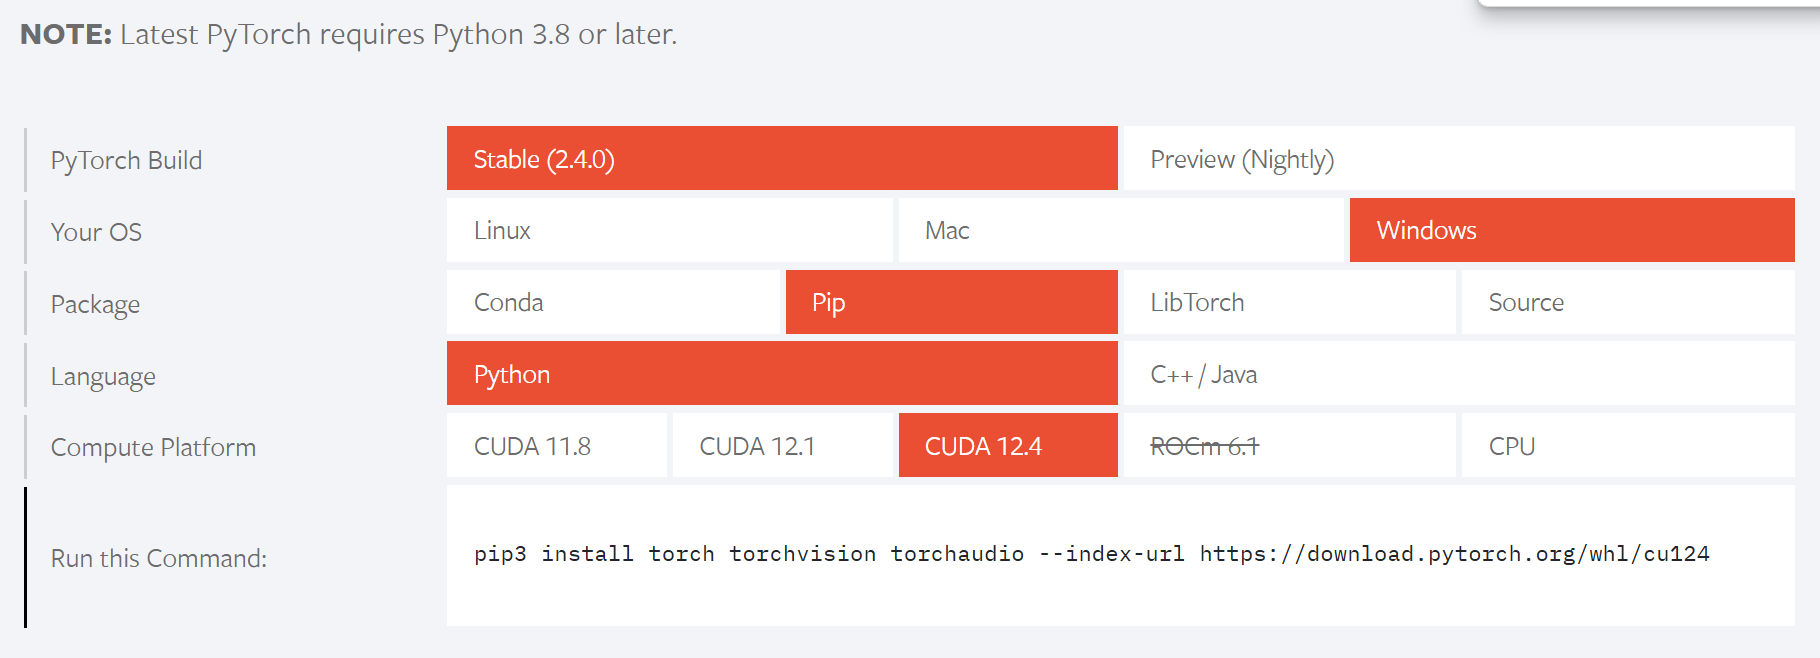

In [ ]:
# Install Dependencies from requirements.txt
%pip install -q -r requirements.txt

## Usage

Load the model and tokenizer, and then use the `answer_question` function to get answers from your document.


In [1]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

modelPath="nikravan/glm-4vq"
tokenizer = AutoTokenizer.from_pretrained(modelPath, trust_remote_code=True)

model = AutoModelForCausalLM.from_pretrained(
    modelPath,
    torch_dtype=torch.bfloat16,
    low_cpu_mem_usage=True,
    trust_remote_code=True,
    device_map="auto"
)


c:\Users\CIPSTAGE\Documents\zahaira\nikravan\Lib\site-packages\huggingface_hub\file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
c:\Users\CIPSTAGE\Documents\zahaira\nikravan\Lib\site-packages\huggingface_hub\file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Unused kwargs: ['_load_in_4bit', '_load_in_8bit', 'quant_method']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\CIPSTAGE\Documents\zahaira\nikravan\Lib\site-packages\huggingface_hub\file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [3]:
# function to extract text from pdf file using pymupdf library 
import pymupdf
def extract_pdf(path):
    doc = pymupdf.open(path)
    text = ""
    for page in doc:
        text += page.get_text()
    return text

## Process pdf file

In [6]:
def process_pdf(query, pdf_path):
    # Extract PDF content
    pdf_content = extract_pdf(pdf_path)

    # Format the query and PDF content
    format_msg = pdf_content + "\n\n\n" + "{} files uploaded.\n" + query

    # Tokenize the input
    inputs = tokenizer.apply_chat_template([{"role": "user", "content": format_msg}],
                                          add_generation_prompt=True, tokenize=True, return_tensors="pt",
                                          return_dict=True)

    # Move inputs to the device (e.g., GPU)
    inputs = inputs.to(device)

    # Set generation parameters
    gen_kwargs = {"max_new_tokens": 2500, "do_sample": True, "top_k": 1}

    # Generate the output
    with torch.no_grad():
        outputs = model.generate(**inputs, **gen_kwargs)
        outputs = outputs[:, inputs['input_ids'].shape[1]:]
        output_text = tokenizer.decode(outputs[0])

    return output_text

# Example usage
query = 'explain all the details in this pdf'
pdf_path = "SampleSyllabus.pdf"
output_text = process_pdf(query, pdf_path)
print(output_text)

Here are the key details from the syllabus for the course "Electrocardiograph Technique & Application":

- Course Title: Electrocardiograph Technique & Application
- Prerequisites: AHC101 Introduction to Health Careers; BI0101 Anatomy & Physiology 1
- Instructor: TBA
- Course Schedule: Classes are scheduled between 8:00 AM and 10:00 PM, weekdays (dependent upon day or evening sessions)
- Course Length: 24 lecture hours / 24 lab hours / 3.0 Quarter Credits
- Course Overview: Students practice basic electrocardiograph patient care techniques, applying legal and ethical responsibilities. Students learn the use of medical instrumentation, electrocardiogram theory, identification of and response to mechanical problems, recognition of cardiac rhythm and response to emergency findings.
- Course Objectives: Students will be able to define key terms, describe cardiac cycle and conduction systems, describe electrocardiogram, maintain equipment, identify rhythms, calculate rate, recognize cardiac

## process an image

In [10]:
from PIL import Image

query ='explain all the details in this picture'
image = Image.open("sales.png").convert('RGB')
#image=""
inputs = tokenizer.apply_chat_template([{"role": "user", "image": image, "content": query}],
                                       add_generation_prompt=True, tokenize=True, return_tensors="pt",
                                       return_dict=True)  # chat with image mode

inputs = inputs.to(device)

gen_kwargs = {"max_length": 2500, "do_sample": True, "top_k": 1}
with torch.no_grad():
    outputs = model.generate(**inputs, **gen_kwargs)
    outputs = outputs[:, inputs['input_ids'].shape[1]:]
    print(tokenizer.decode(outputs[0]))

This image is a Regional Sales Report that provides a detailed breakdown of sales figures for different regions and sub-categories from January to December for the year 2015 to 2017. The report is divided into four main sections, each representing a different region:

1. Central Region: This section shows sales figures for the Central region, with a total of 102.9k sales and a profit of 1.8m. The sales figures are represented by a line graph with fluctuating values, indicating monthly sales trends.

2. East Region: This section shows sales figures for the East region, with a total of 156.3k sales and a profit of 236.8k. The sales figures are also represented by a line graph, showing a similar fluctuation pattern.

3. South Region: This section shows sales figures for the South region, with a total of 71.4k sales and a profit of 1.8m. The sales figures are represented by a line graph with a downward trend, indicating a decrease in sales over time.

4. West Region: This section shows sal